#### LABORATORIO NO. 2

### Problema No. 1

Desarrolle una función que dada una imagen en escala de grises muestre dicha imagen en 3 dimensiones, donde los ejes X e Y representan el dominio espacial de la imagen y Z representa la intensidad del color gris de cada píxel.

In [31]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D

In [32]:
print(os.listdir())

['ciudad.jpeg', 'Costa Maya Reef Resort.jpeg', 'lab1.pdf', 'Lab2-Instrucciones.docx', 'Laboratorio No. 2 - Irma Enriquez.ipynb', 'panajachel.JPG', 'Piscina.jpeg', 'Viaje - copia.jpeg']


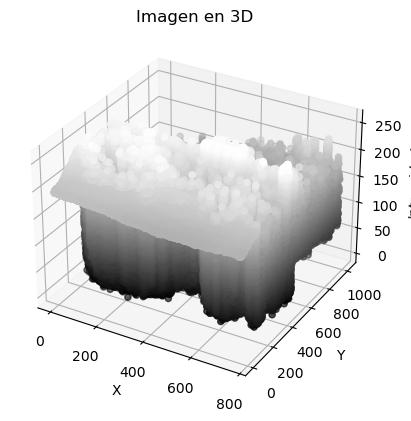

In [33]:
#Cargar la imagen en escala de grises
imagen = plt.imread("Piscina.jpeg")
imagen_gris = np.mean(imagen, axis=2) # Convertir a escala de grises

#Obtienen el tamaño
alto, ancho = imagen_gris.shape

#Crea los arreglos X, Y y Z
x = np.arange(ancho)
y = np.arange(alto)
x, y = np.meshgrid(x, y)
z = imagen_gris.flatten()

#Realiza la figura y el subplot en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

#Muestra el 3D
ax.scatter(x, y, z, c=z, cmap="gray")

#Configura los ejes y los títulos
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Intensidad")
ax.set_title("Imagen en 3D")

#Muestra la imagen en 3D
plt.show()

### Problema No. 2

Implemente una función para cada una de las transformaciones vistas en clase: negativa, lineal,
logarítmica y exponencial.

In [34]:
#Realiza carga de foto
viaje = plt.imread('Viaje.jpeg')

#Realiza transformación negativa
def transformacion_negativa(img):
    negativa = 255 - img
    plt.imshow(negativa)
    plt.title("Negativa")
    plt.show()

#Realiza transformación lineal
def transformacion_lineal(img, a, b):
    lineal = np.clip(a * img + b, 0, 255).astype(np.uint8)
    plt.imshow(lineal)
    plt.title("Lineal")
    plt.show()

#Realiza transformación logarítmica
def transformacion_logaritmica(img, c):
    logaritmica = c * np.log(1 + img)
    logaritmica = np.clip(logaritmica, 0, 255).astype(np.uint8)
    plt.imshow(logaritmica)
    plt.title("Logaritmica")
    plt.show()

#Realiza transformación exponencial
def transformacion_exponencial(img, r):
    exponencial = np.power(img, r)
    exponencial = np.clip(exponencial, 0, 255).astype(np.uint8)
    plt.imshow(exponencial)
    plt.title("Exponencial")
    plt.show()

#Ejucuta todas las transformaciones
transformacion_negativa(viaje)
transformacion_lineal(viaje, 1, 0)
transformacion_logaritmica(viaje, 1)
transformacion_exponencial(viaje, 1)

FileNotFoundError: [Errno 2] No such file or directory: 'Viaje.jpeg'

### Problema No. 3

Desarrolle una función que, dada dos imágenes a color, realice las operaciones SUMA, RESTA, AND, OR, XOR con ambas imágenes recuerde que para realizar las operaciones lógicas es necesario pasar la imagen a escala de grises y luego binarizarla.


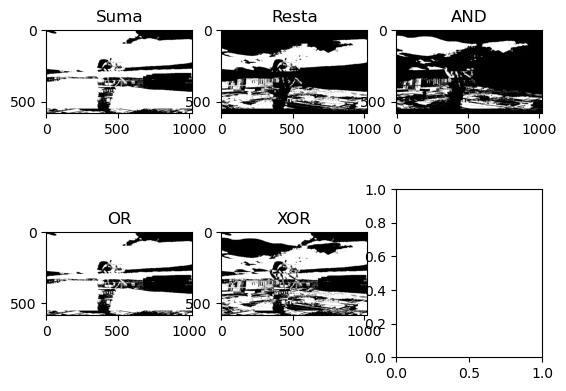

In [ ]:
def realizar_operaciones(imagen1, imagen2):
    img1 = cv2.imread(imagen1)
    img2 = cv2.imread(imagen2)
    
    #Realizar cambio a escala de grises
    gray_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    
    #Redimensionar imagenes
    if gray_img1.shape != gray_img2.shape:
        gray_img2 = cv2.resize(gray_img2, (gray_img1.shape[1], gray_img1.shape[0]))
    
    #Imágenes binarias
    _, binary_img1 = cv2.threshold(gray_img1, 127, 255, cv2.THRESH_BINARY)
    _, binary_img2 = cv2.threshold(gray_img2, 127, 255, cv2.THRESH_BINARY)
    
    #Operaciones lógicas
    suma = cv2.add(binary_img1, binary_img2)
    resta = cv2.subtract(binary_img1, binary_img2)
    bitwise_and = cv2.bitwise_and(binary_img1, binary_img2)
    bitwise_or = cv2.bitwise_or(binary_img1, binary_img2)
    bitwise_xor = cv2.bitwise_xor(binary_img1, binary_img2)
    
    #Mostrar las imágenes resultantes
    fig, axes = plt.subplots(2, 3)
    axes[0, 0].imshow(suma, cmap='gray')
    axes[0, 0].set_title('Suma')
    axes[0, 1].imshow(resta, cmap='gray')
    axes[0, 1].set_title('Resta')
    axes[0, 2].imshow(bitwise_and, cmap='gray')
    axes[0, 2].set_title('AND')
    axes[1, 0].imshow(bitwise_or, cmap='gray')
    axes[1, 0].set_title('OR')
    axes[1, 1].imshow(bitwise_xor, cmap='gray')
    axes[1, 1].set_title('XOR')
    
    plt.show()

#Resultados
realizar_operaciones('Costa Maya Reef Resort.jpeg', 'ciudad.jpeg')


### Problema No. 4

Realice una comparación entre el algoritmo de Canny, el operador de Sobel y el operador Laplaciano para encontrar los bordes en una imagen, para este ejercicio puede utilizar las funciones de openCV y cualquier imagen, como entregable debe mostrar una comparación entre los tres enfoques con una tabla donde se muestre las ventajas y desventajas de cada enfoque.

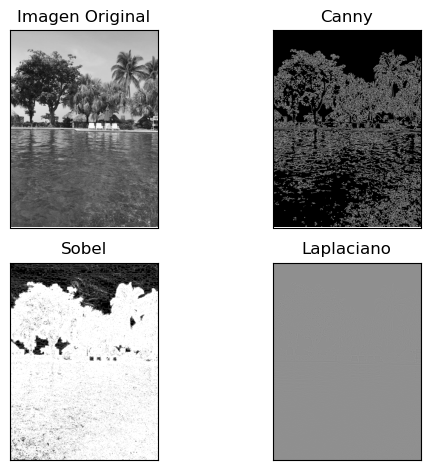

In [ ]:
#Realizar carga de la imagen
image = cv2.imread('Piscina.jpeg', cv2.IMREAD_GRAYSCALE)

#Canny
canny = cv2.Canny(image, 100, 200)

#Sobel
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
sobel = cv2.bitwise_or(cv2.convertScaleAbs(sobel_x), cv2.convertScaleAbs(sobel_y))

#Laplaciano
laplacian = cv2.Laplacian(image, cv2.CV_64F)

#Resultados
plt.subplot(2,2,1), plt.imshow(image, cmap="gray")
plt.title("Imagen Original"), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2), plt.imshow(canny, cmap="gray")
plt.title("Canny"), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3), plt.imshow(sobel, cmap="gray")
plt.title("Sobel"), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4), plt.imshow(laplacian, cmap="gray")
plt.title("Laplaciano"), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

### Problema No. 5

Utilizando funciones de OpenCV debería aplicar los filtros de convolución de tamaño de kernel (3x3,
5x5 y 7x7) las operaciones que debería realizar son las siguientes:
•	Kernel Gaussiano de riodo.
•	Kernel Box de ruido.
•	Kernel de mediana para ruido.
•	Kernel Sobel para detección de bornes (en X e Y).
•	Kernel Lapaciano para detección de bordes.
•	Kernel de realce (Sharpening).
•	Kernel de relieve (Embossing)

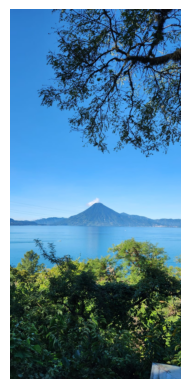

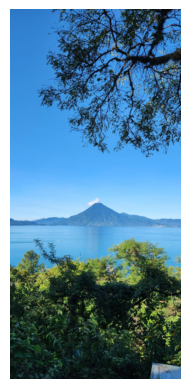

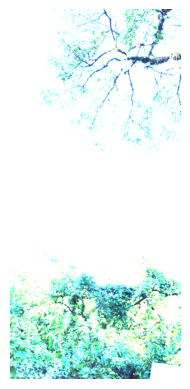

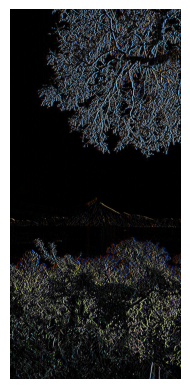

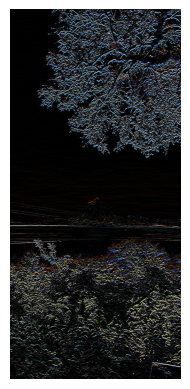

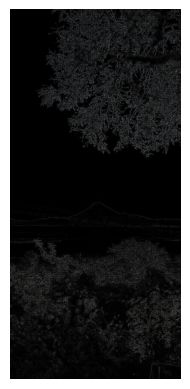

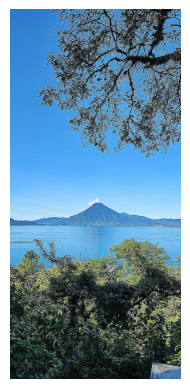

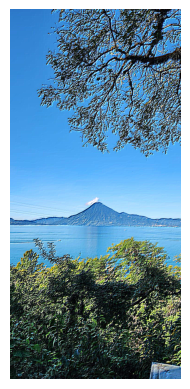

In [ ]:
def aplicar_filtro_convolucion(imagen, kernel):
    imagen_procesada = cv2.filter2D(imagen, -1, kernel)
    plt.imshow(cv2.cvtColor(imagen_procesada, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

#Realizar carga de imagen
imagen = cv2.imread("panajachel.JPG")

#Definición de convulción
kernel_gaussiano = np.array([[1, 2, 1],
                             [2, 4, 2],
                             [1, 2, 1]]) / 16

kernel_box = np.ones((3, 3)) / 9

kernel_mediana = np.ones((3, 3))

kernel_sobel_x = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])

kernel_sobel_y = np.array([[-1, -2, -1],
                           [0, 0, 0],
                           [1, 2, 1]])

kernel_laplaciano = np.array([[0, 1, 0],
                              [1, -4, 1],
                              [0, 1, 0]])

kernel_realce = np.array([[-1, -1, -1],
                          [-1, 9, -1],
                          [-1, -1, -1]])

kernel_relieve = np.array([[-2, -1, 0],
                           [-1, 1, 1],
                           [0, 1, 2]])

#Resultados 
aplicar_filtro_convolucion(imagen, kernel_gaussiano)
aplicar_filtro_convolucion(imagen, kernel_box)
aplicar_filtro_convolucion(imagen, kernel_mediana)
aplicar_filtro_convolucion(imagen, kernel_sobel_x)
aplicar_filtro_convolucion(imagen, kernel_sobel_y)
aplicar_filtro_convolucion(imagen, kernel_laplaciano)
aplicar_filtro_convolucion(imagen, kernel_realce)
aplicar_filtro_convolucion(imagen, kernel_relieve)